# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [37]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [38]:
fitbit = pd.read_csv("../data/Fitbit2.csv")
fitbit.sample()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
343,2016-04-14,3479,19087,14.65,17,711.0,221,12,96,1954,...,9.103085,Thursday,3.0,1,4.633333,91.447368,6.083333,84.883721,April,4


In [39]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How does the average number of steps change by month? Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or_Weekend columns.
* Set your size figure to 12,4
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

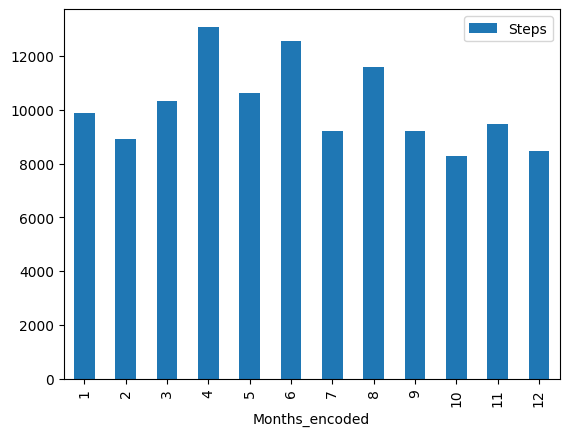

In [59]:
steps_month = fitbit.groupby("Months_encoded").agg({"Steps":"mean"})
steps_month.plot(kind="bar");

In [41]:
#also:
steps_month = fitbit.groupby("Months_encoded").agg({"Steps":"mean"})
steps_month.sample()

,Steps
Months_encoded,
7,9193.322581


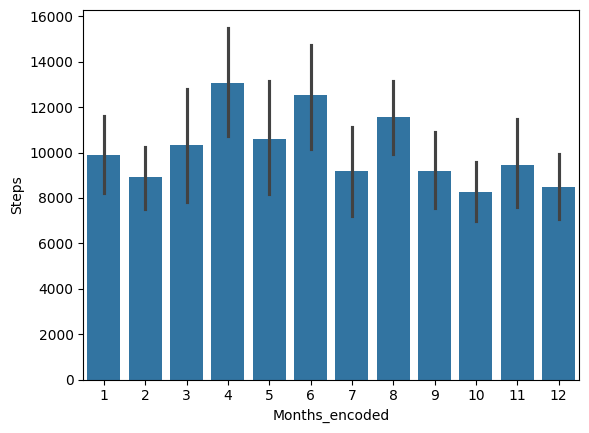

In [42]:
#also:
barplot = sns.barplot(x="Months_encoded", y="Steps", data=fitbit)

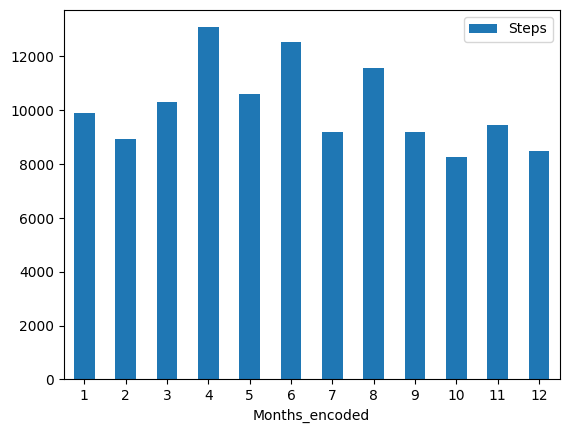

In [44]:
#with plt.xticks()
fitbit.groupby("Months_encoded").agg({"Steps":"mean"}).plot(kind="bar")
plt.xticks(rotation = 0.5)
plt.plot(figsize=(12,4))
plt.savefig("../figures/steps_month.png")

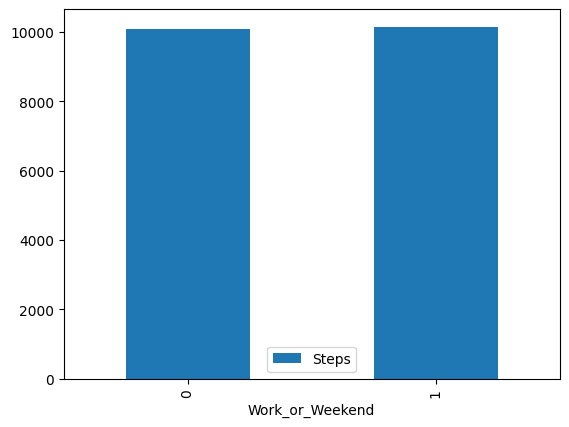

In [60]:
steps_week = fitbit.groupby("Work_or_Weekend").agg({"Steps":"mean"})
steps_week.plot(kind="bar");

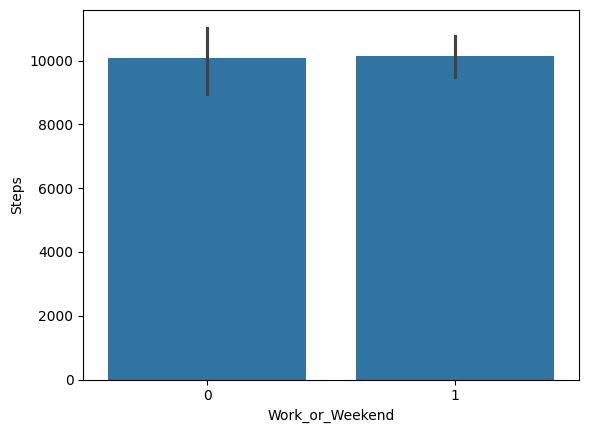

In [8]:
#also:
barplot = sns.barplot(x="Work_or_Weekend", y="Steps", data=fitbit)

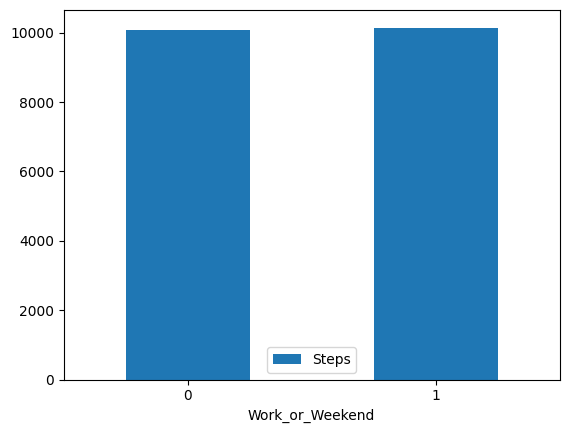

In [45]:
fitbit.groupby("Work_or_Weekend").agg({"Steps":"mean"}).plot(kind="bar")
plt.xticks(rotation = 0.5)
plt.plot(figsize=(12,4))
plt.savefig("../figures/steps_week.png")

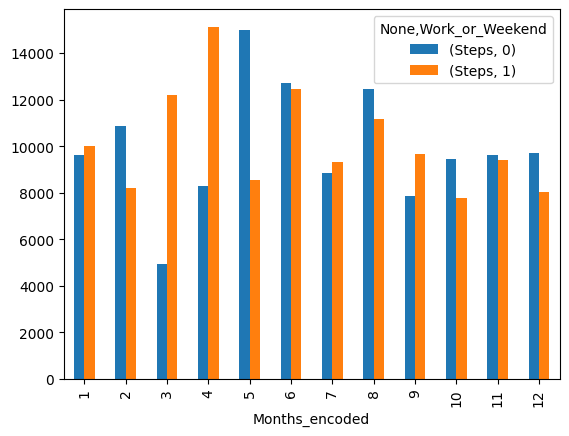

In [61]:
step_month_week = fitbit.groupby(["Months_encoded", "Work_or_Weekend"]).agg({"Steps":"mean"}).unstack()
step_month_week
step_month_week.plot(kind="bar");

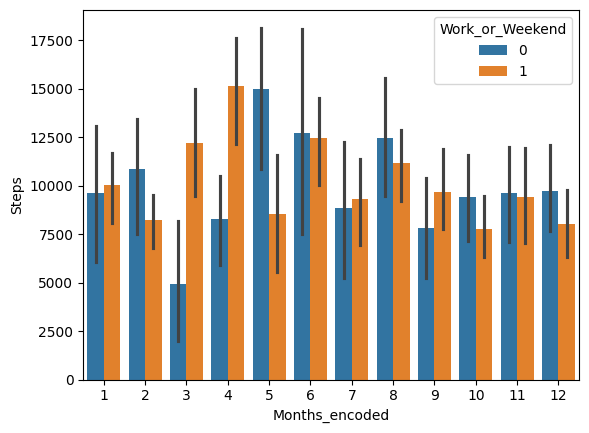

In [10]:
#also:
barplot = sns.barplot(x="Months_encoded", hue="Work_or_Weekend", y="Steps", data=fitbit)

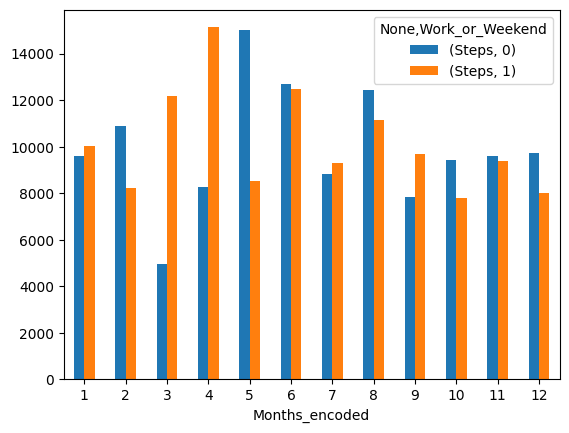

In [46]:
fitbit.groupby(["Months_encoded", "Work_or_Weekend"]).agg({"Steps":"mean"}).unstack().plot(kind="bar")
plt.xticks(rotation = 0.5)
plt.plot(figsize=(12,4))
plt.savefig("../figures/step_month_week.png")

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

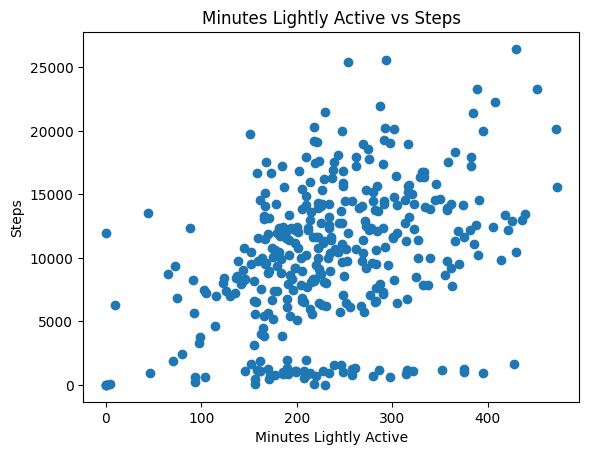

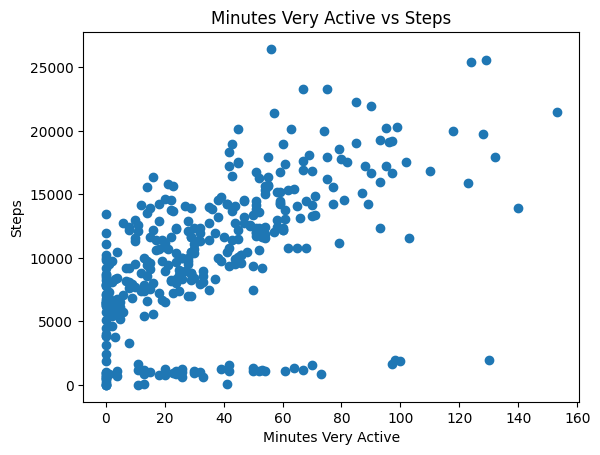

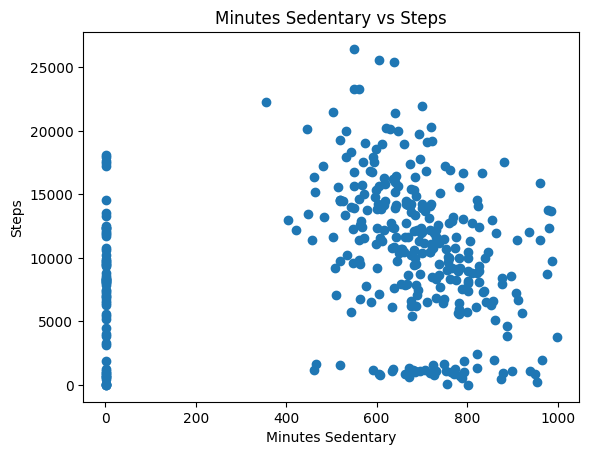

In [58]:
lst = ("Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary")

for i in lst:
    plt.figure()
    plt.scatter(x=fitbit[i], y=fitbit["Steps"]);
    plt.xlabel(i)
    plt.ylabel('Steps')  
    plt.title(f"{i} vs Steps") 
    plt.savefig(f"../figures/{i} vs Steps.png")